In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
message=pd.read_csv('spam.csv',names=["labels","message"])
message.head(10)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
message.shape

(5572, 2)

### Exploratory Data Analysis

In [4]:
message.describe() #printing the description of the message 

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
message.groupby('labels').describe() #for better understanding the describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [6]:
message['length']=message['message'].apply(len) #printing the length of each observation
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

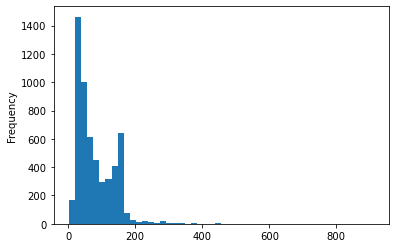

In [7]:
message['length'].plot(bins=50,kind='hist') #plotting the length of each observation

In [8]:
message.length.describe()

count    5572.000000
mean       80.057968
std        59.623449
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [9]:
message[message['length']==910]['message'].iloc[0] #getting 910 because of the max in the describe()
                            #analysis - there is a text which contains the 910 len so lets display it

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Text Pre-processing

In [10]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation] #Getting the value which doesnt have a punct
    nopunc=''.join(nopunc)   #joining all the words without the punctuation
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] #removing stop words

In [11]:
message.head() #original dataframe

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
message['message'].head(5).apply(text_process) #tokenization of all the words in the message

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Vectorization

In [13]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['message'])
print(len(bow_transformer.vocabulary_))

11301


In [14]:
message4=message['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [15]:
bow4=bow_transformer.transform([message4])  #Vector representation of the previous sentence
print(bow4)
print(bow4.shape)  #analysis - This means that there are seven unique words in message4

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2
(1, 11301)


In [16]:
#checking which one appear twice
print(bow_transformer.get_feature_names()[3996]) 
print(bow_transformer.get_feature_names()[9445])

U
say


/home/suvetha/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
messages_bow = bow_transformer.transform(message['message']) #.transform on our Bag-of-Words transformed object and transform the entire DataFrame of messages

In [21]:
print('Shape of Sparse Matrix: ',messages_bow.shape)
print('Amount of non-zero occurences:',messages_bow.nnz) #non 0 occurances

Shape of Sparse Matrix:  (5572, 11301)
Amount of non-zero occurences: 50193


In [22]:
sparsity =(100.0 * messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity))) 
#messages_bow.shape[0] - 5572 and 1 represents 11301

sparsity:0


In [23]:
from sklearn.feature_extraction.text import TfidfTransformer #TF-IDF stands for term frequency-inverse document frequency
tfidf_transformer=TfidfTransformer().fit(messages_bow) #the frequency of the particular word is shown
                                                       #foreg 0.5 is the average occurance of the given word
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [24]:
#inverse document frequency(idf) - determines how important the term is
#IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.288863056423095
8.527076498901426


In [25]:
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11301)


### Training a model

In [26]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,message['labels'])

In [42]:
print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('expected:',message.labels[3])

predicted: ham
expected: ham


### Model Evaluation

In [28]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(message['labels'],all_predictions))
print(confusion_matrix(message['labels'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 114  633]]


### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['message'],message['labels'],test_size=0.2)

In [31]:
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

4457 1115 4457 1115


### Creating a Data Pipeline

In [32]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [33]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f4b00f1a940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [37]:
predictions = pipeline.predict(msg_test)

In [38]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1011
        spam       0.70      1.00      0.83       104

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

